In [3]:
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

In [4]:
def bond_price(maturity, coupon_rate, face_value, ytm):
    
    coupon = coupon_rate*face_value

    discount_factors = [1/(1+ytm)**i for i in range(1, maturity+1)]
    cashflows = [coupon]*maturity
    cashflows [-1] += face_value

    return np.array(discount_factors)@np.array(cashflows)



def bond_price_settlement(maturity_date, coupon_rate, face_value, ytm, settlement_date):
    coupon = coupon_rate*face_value

    settlement_date = datetime.strptime(settlement_date, "%d/%m/%Y")
    maturity_date = datetime.strptime(maturity_date, "%d/%m/%Y")
    last_coupon_date = maturity_date.replace(year=settlement_date.year-1)
    next_coupon_date = maturity_date.replace(year=settlement_date.year)

    maturity = maturity_date.year-next_coupon_date.year+1

    t1 = (next_coupon_date-settlement_date).days/365

    time = np.array([t1 + i for i in range(maturity)])
    cashflows = np.array([coupon]*maturity)
    cashflows[-1] += face_value
    discount_factors = 1/(1+ytm)**time

    accrued_interest = (settlement_date - last_coupon_date).days/365 * coupon

    dirty_price = discount_factors@cashflows
    clean_price = dirty_price - accrued_interest

    return dirty_price, clean_price



def duration(maturity, coupon_rate, face_value, ytm, mod=True):
    coupon = coupon_rate*face_value
    discount_factors_time = [i/(1+ytm)**i for i in range(1, maturity+1)]
    cashflows = [coupon]*maturity
    cashflows [-1] += face_value

    P = bond_price(maturity, coupon_rate, face_value, ytm)

    
    if mod == True:
        return np.array(discount_factors_time)@np.array(cashflows)/(P*(1+ytm))
    else:
        return np.array(discount_factors_time)@np.array(cashflows)/P


def convexity(maturity, coupon_rate, face_value, ytm):
    coupon = coupon_rate*face_value
    discount_factors_time = [i*(i+1)/(1+ytm)**i for i in range(1, maturity+1)]
    cashflows = [coupon]*maturity
    cashflows [-1] += face_value

    P = bond_price(maturity, coupon_rate, face_value, ytm)

    return np.array(discount_factors_time)@np.array(cashflows)/(P*(1+ytm)**2)

In [5]:
#Parameters:

maturity = 5
coupon_rate = 0.05
face_value = 100
ytm = 0.03

p = bond_price(maturity, coupon_rate, face_value, ytm)
d = duration(maturity, coupon_rate, face_value, ytm)
c = convexity(maturity, coupon_rate, face_value, ytm)

print(f'Bond price  = {p} \nDuration = {d} \nConvexity = {c}')

Bond price  = 109.15941437438906 
Duration = 4.435010164529816 
Convexity = 25.032648417497295


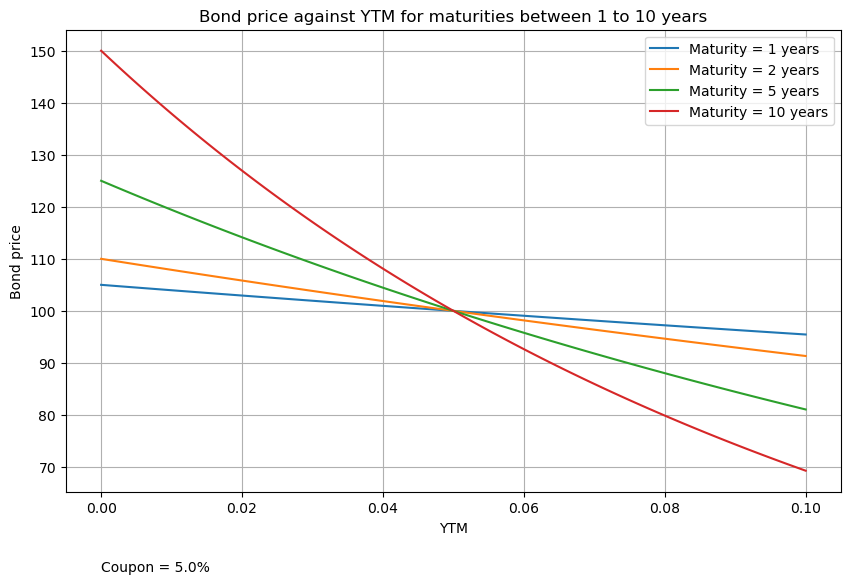

In [6]:
coupon_rate = 0.05
face_value = 100

rate_range = np.linspace(0.00,0.1,100)
maturity_range = [1, 2, 5, 10]

plt.figure(figsize=(10,6))

for maturity in maturity_range: 
    price_values = [bond_price(maturity, coupon_rate, face_value, rate) for rate in rate_range]
    plt.plot(rate_range, price_values, '-', label=f'Maturity = {maturity} years')


#plt.plot(rate_range, price_values, '-')
plt.xlabel('YTM')
plt.ylabel('Bond price')
plt.text(0, 50, s=f'Coupon = {coupon_rate*100}%')
plt.title('Bond price against YTM for maturities between 1 to 10 years')
plt.legend()
plt.grid()
plt.show()

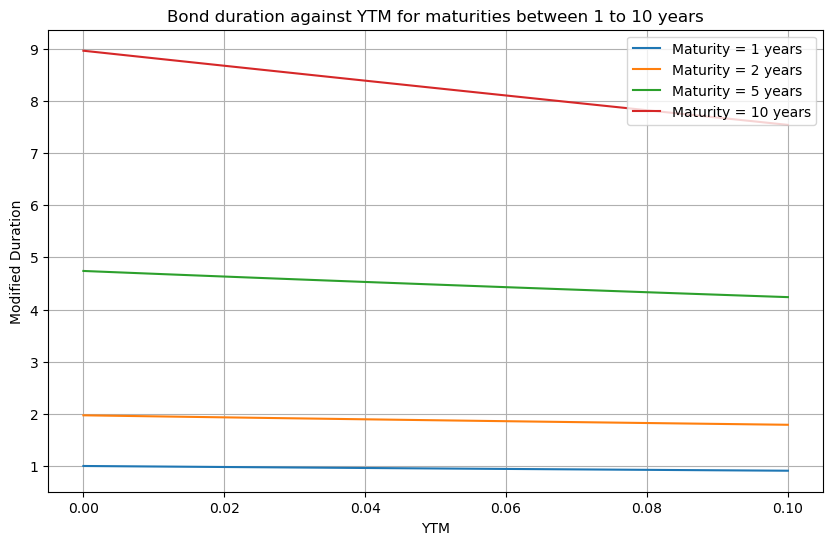

" plt.figure(figsize=(10,6))\n\nfor maturity in maturity_range: \n    duration_values = [duration(maturity, coupon_rate, face_value, rate) for rate in rate_range]\n    duration_values = duration_values/np.mean(duration_values)\n    plt.plot(rate_range, duration_values, '-', label=f'Maturity = {maturity} years')\n\n\nplt.xlabel('YTM')\nplt.ylabel('Modified Duration')\nplt.title('Rescaled Bond duration against YTM for maturities between 1 to 10 years')\nplt.legend()\nplt.grid()\nplt.show() "

In [7]:
coupon_rate = 0.03
face_value = 100

rate_range = np.linspace(0.00,0.1,100)
maturity_range = [1, 2, 5, 10]

plt.figure(figsize=(10,6))

for maturity in maturity_range: 
    duration_values = [duration(maturity, coupon_rate, face_value, rate) for rate in rate_range]
    plt.plot(rate_range, duration_values, '-', label=f'Maturity = {maturity} years')


plt.xlabel('YTM')
plt.ylabel('Modified Duration')
plt.title('Bond duration against YTM for maturities between 1 to 10 years')
plt.legend()
plt.grid()
plt.show()


#Convexity with same scale
""" plt.figure(figsize=(10,6))

for maturity in maturity_range: 
    duration_values = [duration(maturity, coupon_rate, face_value, rate) for rate in rate_range]
    duration_values = duration_values/np.mean(duration_values)
    plt.plot(rate_range, duration_values, '-', label=f'Maturity = {maturity} years')


plt.xlabel('YTM')
plt.ylabel('Modified Duration')
plt.title('Rescaled Bond duration against YTM for maturities between 1 to 10 years')
plt.legend()
plt.grid()
plt.show() """

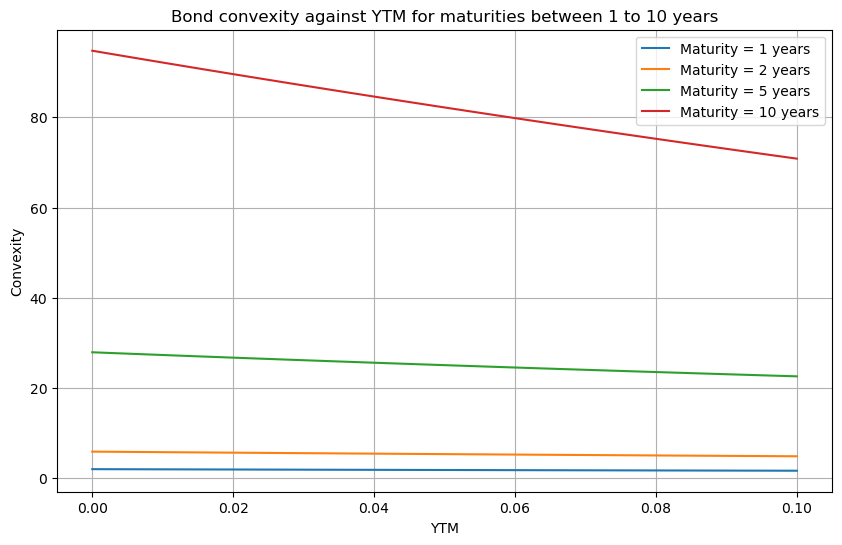

" plt.figure(figsize=(10,6))\n\nfor maturity in maturity_range: \n    convexity_values = [convexity(maturity, coupon_rate, face_value, rate) for rate in rate_range]\n    convexity_values = convexity_values/np.mean(convexity_values)\n    plt.plot(rate_range, convexity_values, '-', label=f'Maturity = {maturity} years')\n\n\nplt.xlabel('YTM')\nplt.ylabel('Convexity')\nplt.title('Rescaled Bond convexity against YTM for maturities between 1 to 10 years')\nplt.legend()\nplt.grid()\nplt.show() "

In [8]:
coupon_rate = 0.03
face_value = 100

rate_range = np.linspace(0.00,0.1,100)
maturity_range = [1, 2, 5, 10]
#maturity_range = [5]

plt.figure(figsize=(10,6))

for maturity in maturity_range: 
    convexity_values = [convexity(maturity, coupon_rate, face_value, rate) for rate in rate_range]
    plt.plot(rate_range, convexity_values, '-', label=f'Maturity = {maturity} years')


plt.xlabel('YTM')
plt.ylabel('Convexity')
plt.title('Bond convexity against YTM for maturities between 1 to 10 years')
plt.legend()
plt.grid()
plt.show()


""" plt.figure(figsize=(10,6))

for maturity in maturity_range: 
    convexity_values = [convexity(maturity, coupon_rate, face_value, rate) for rate in rate_range]
    convexity_values = convexity_values/np.mean(convexity_values)
    plt.plot(rate_range, convexity_values, '-', label=f'Maturity = {maturity} years')


plt.xlabel('YTM')
plt.ylabel('Convexity')
plt.title('Rescaled Bond convexity against YTM for maturities between 1 to 10 years')
plt.legend()
plt.grid()
plt.show() """

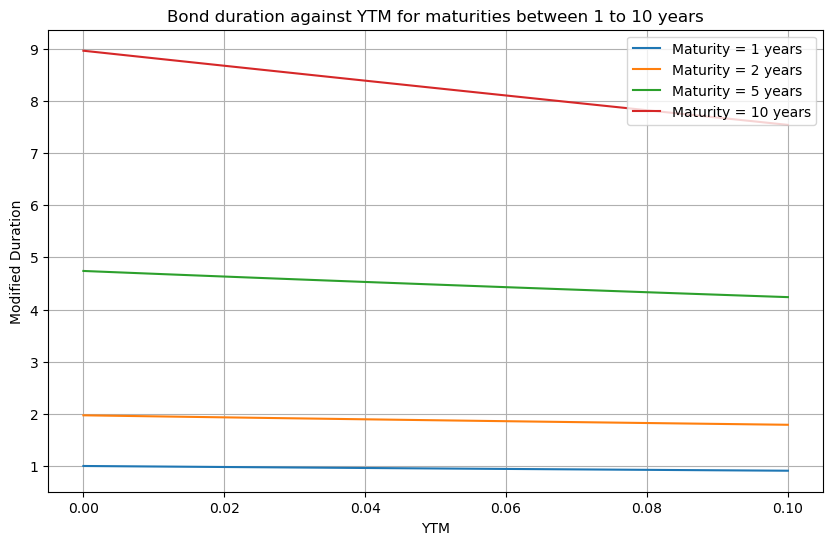

In [9]:
face_value = 100
YTM = 0.03

coupon_range = np.linspace(0.00,0.1,100)
maturity_range = [1, 2, 5, 10]

plt.figure(figsize=(10,6))

for maturity in maturity_range: 
    duration_values = [duration(maturity, coupon_rate, face_value, rate) for rate in rate_range]
    plt.plot(rate_range, duration_values, '-', label=f'Maturity = {maturity} years')


plt.xlabel('YTM')
plt.ylabel('Modified Duration')
plt.title('Bond duration against YTM for maturities between 1 to 10 years')
plt.legend()
plt.grid()
plt.show()


In [10]:
def plot_line(coupon):

    maturity = 1
    face_value = 100
    ytm = 0.035

    rate_range = np.linspace(0.01, 0.1,100)
    price = [bond_price(maturity, coupon, face_value, rate) for rate in rate_range]

    plt.figure(figsize=(6, 4))
    plt.title('Bond price against YTM')
    plt.plot(rate_range, price)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.show()

interact(plot_line, coupon=widgets.FloatSlider(min=0.01, max=0.1, step=0.005, value=0.05, description='Coupon'))

interactive(children=(FloatSlider(value=0.05, description='Coupon', max=0.1, min=0.01, step=0.005), Output()),…

<function __main__.plot_line(coupon)>

In [11]:
def coupon_sensitivity(coupon):
    maturity = 1
    face_value = 100
    ytm = 0.035

    p = bond_price(maturity, coupon, face_value, ytm)
    dmod = duration(maturity, coupon, face_value, ytm)
    c = convexity(maturity, coupon, face_value, ytm)
    print(f'Bond price = {p} \nDuration = {dmod} \nConvexity = {c}')


def maturity_sensitivity(maturity):
    coupon = 0.05
    face_value = 100
    ytm = 0.035

    p = bond_price(maturity, coupon, face_value, ytm)
    dmod = duration(maturity, coupon, face_value, ytm)
    c = convexity(maturity, coupon, face_value, ytm)
    print(f'Bond price  = {p} \nDuration = {dmod} \nConvexity = {c}')


interact(coupon_sensitivity, coupon=widgets.FloatSlider(min=0.01, max=0.1, step=0.005, value=0.05, description='Coupon'))
interact(maturity_sensitivity, maturity=widgets.IntSlider(min=1, max=30, step=1, value=1, description='Maturity'))

interactive(children=(FloatSlider(value=0.05, description='Coupon', max=0.1, min=0.01, step=0.005), Output()),…

interactive(children=(IntSlider(value=1, description='Maturity', max=30, min=1), Output()), _dom_classes=('wid…

<function __main__.maturity_sensitivity(maturity)>

In [ ]:
def plot_price(maturity):
    coupon_rate = 0.04
    face_value = 100

    rate_range = np.linspace(0, 0.1, 100)

    price_values = [bond_price(maturity, coupon_rate, face_value, rate) for rate in rate_range]

    plt.plot(rate_range, price_values)
    plt.grid()
    plt.show()


interact(plot_price, maturity=widgets.IntSlider(min=0, max=100, step=1, value=1, description='Matuirty'))

interactive(children=(IntSlider(value=1, description='Matuirty'), Output()), _dom_classes=('widget-interact',)…

<function __main__.plot_price(maturity)>